## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
data = pd.read_excel("Data_User_Modeling_Dataset_.xls", sheet_name=["Training_Data","Test_Data"]) 

# merged training and test data and create a full dataset
data = pd.concat([data["Training_Data"], data["Test_Data"]], axis=0)
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [3]:
# change the UNS column name to the Level
data.rename(columns={' UNS':'Level'}, inplace=True)
data.head()

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [4]:
# see the unique values of Level column
data['Level'].unique()

array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

In [5]:
# there are two types very low
# finde the values very_low and change as Very Low
data.loc[data["Level"] == "very_low",'Level'] = "Very Low"
data.head()

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [6]:
# check the unique values 
data['Level'].unique()

array(['Very Low', 'High', 'Low', 'Middle'], dtype=object)

## Exploratory Data Analysis and Data Visualization

In [7]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 144
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   Level   403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 22.0+ KB


In [8]:
# statistical information about data
data.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


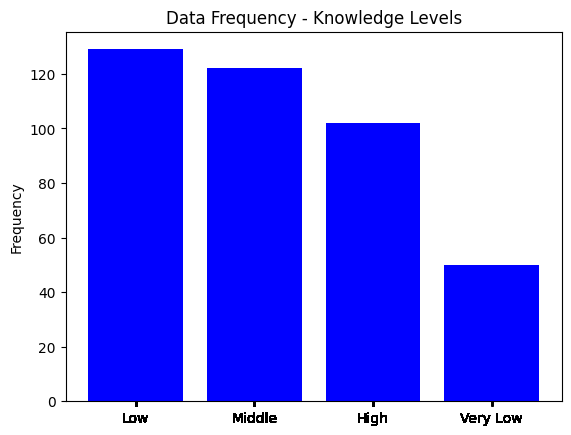

Number of Knowledge Levels 
Low         129
Middle      122
High        102
Very Low     50
Name: Level, dtype: int64


In [9]:
# Number of Knowledge Level 
plt.figure()
plt.bar(data["Level"].value_counts().index, data["Level"].value_counts(), color = "blue")
plt.xticks(data["Level"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Knowledge Levels")
plt.show()
print(f"Number of Knowledge Levels \n{data['Level'].value_counts()}")

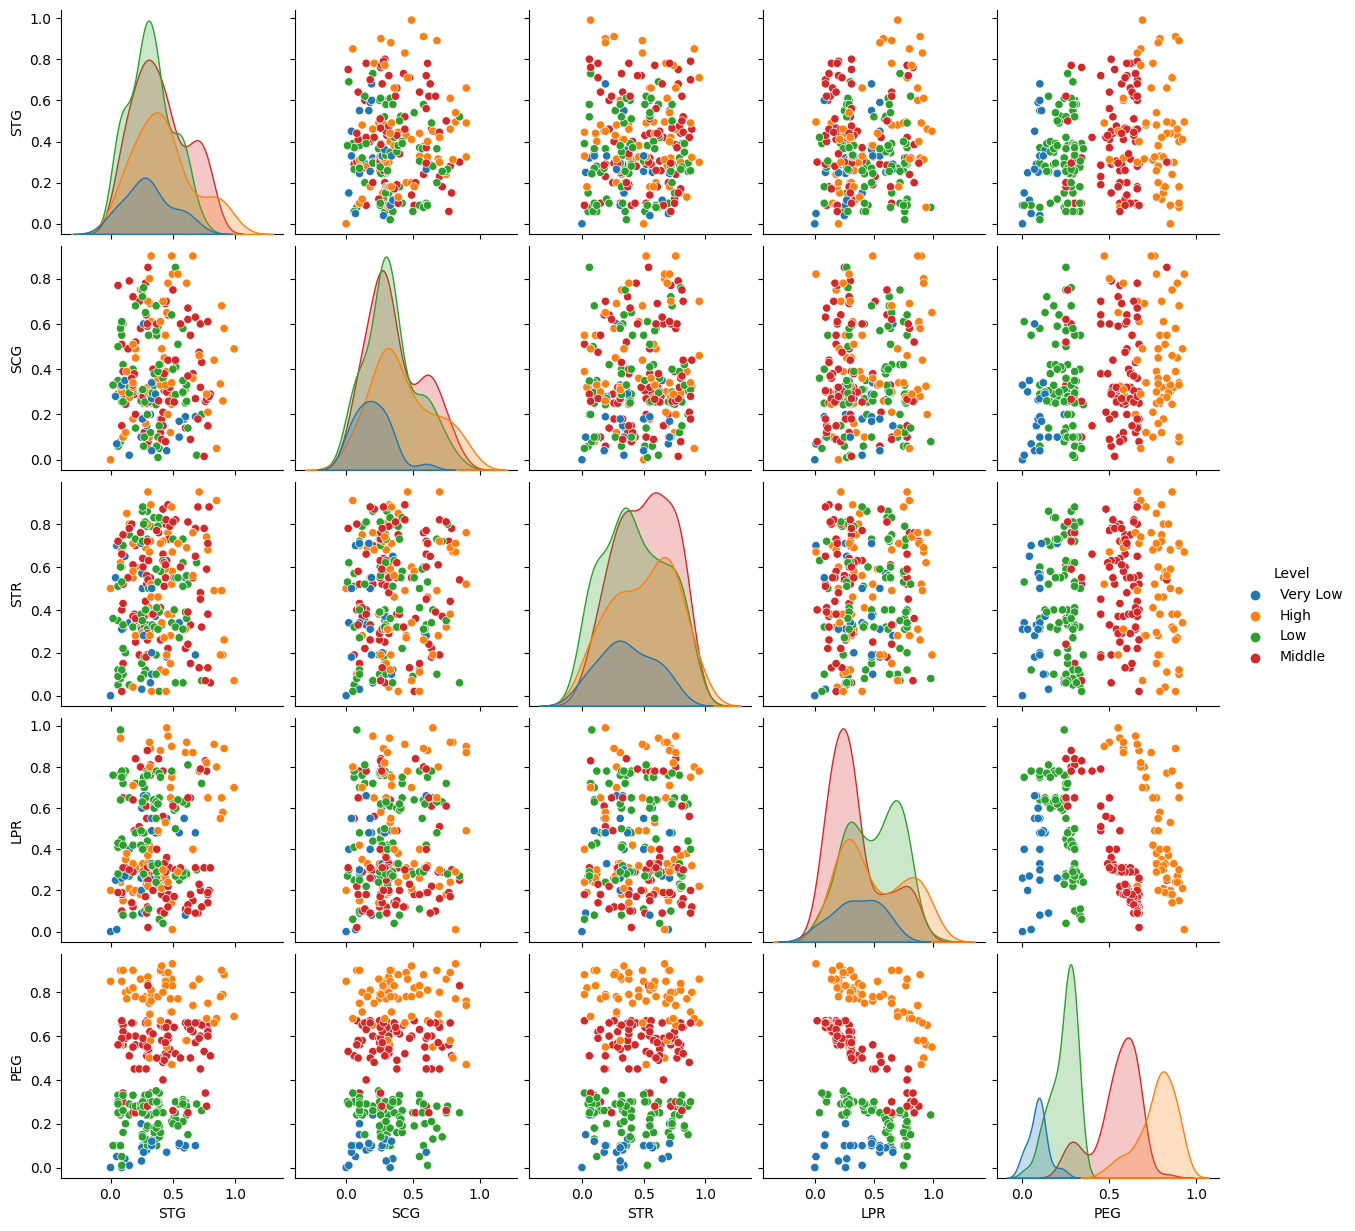

In [10]:
# see pairplot for relation between the variables 
# To remove rows with duplicated indices to plot pairplot
dup_data = data[~data.index.duplicated()]
temp_data = dup_data.loc[:,["STG", "SCG" , "STR", "LPR", "PEG", "Level"]] 
sns.pairplot(temp_data, hue="Level")
plt.show()

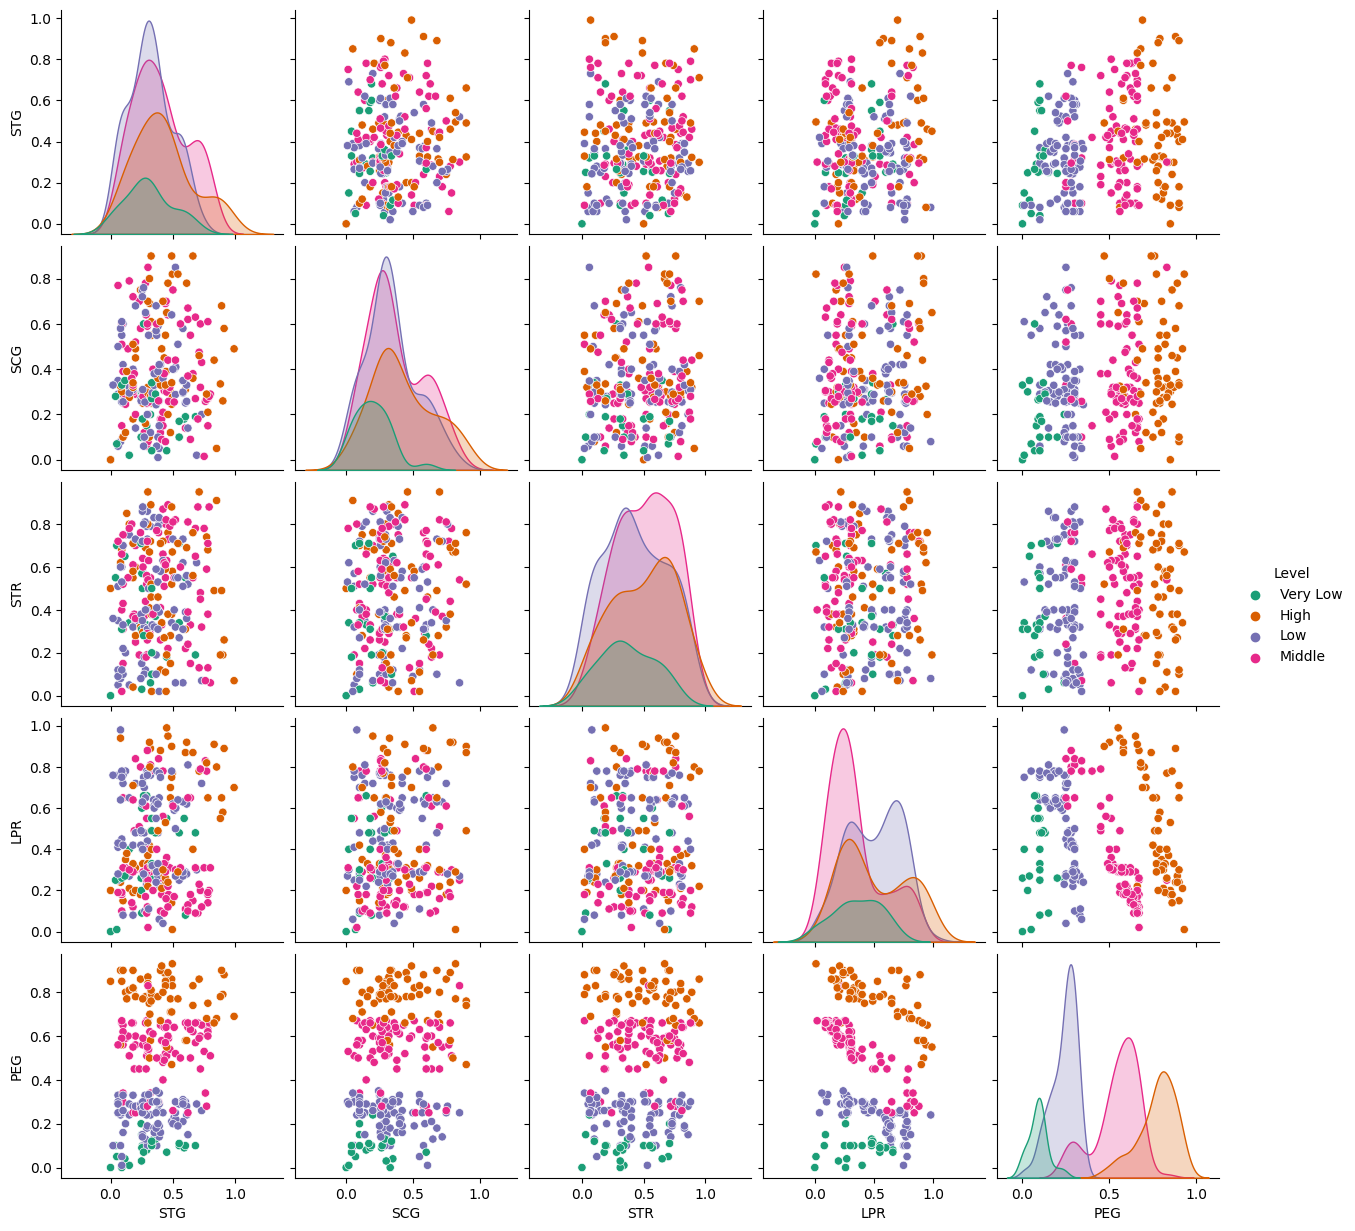

In [11]:
# see pairplot for relation between the variables 
# To remove rows with duplicated indices to plot pairplot
#dup_data = data[~data.index.duplicated()]
#temp_data = dup_data.loc[:,["STG", "SCG" ,"STR","LPR", "PEG"]] 
sns.pairplot(data[~data.index.duplicated()], hue="Level", palette='Dark2')
plt.show()

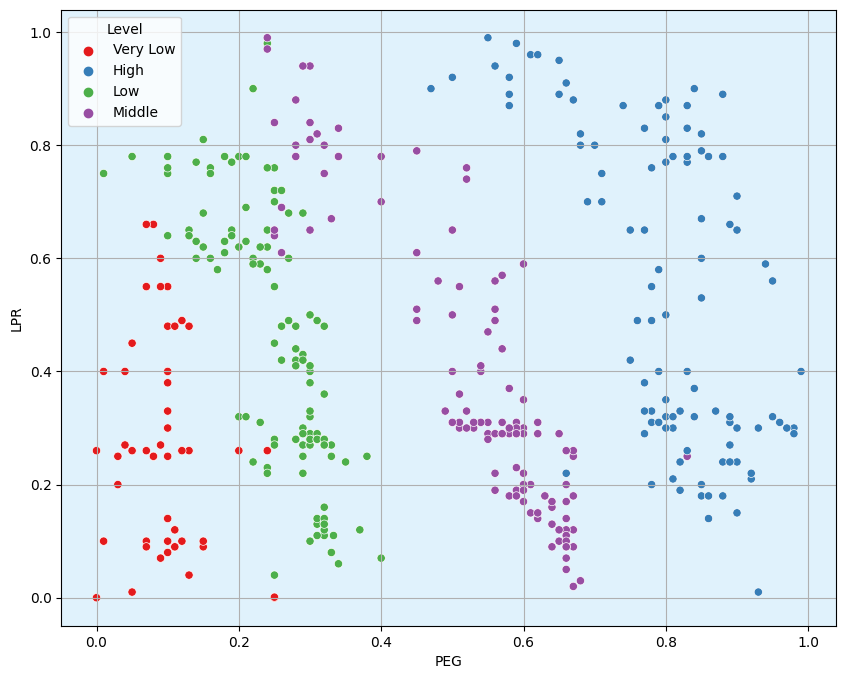

In [12]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['PEG'], data['LPR'], hue=data['Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

Peg is very distinguishing

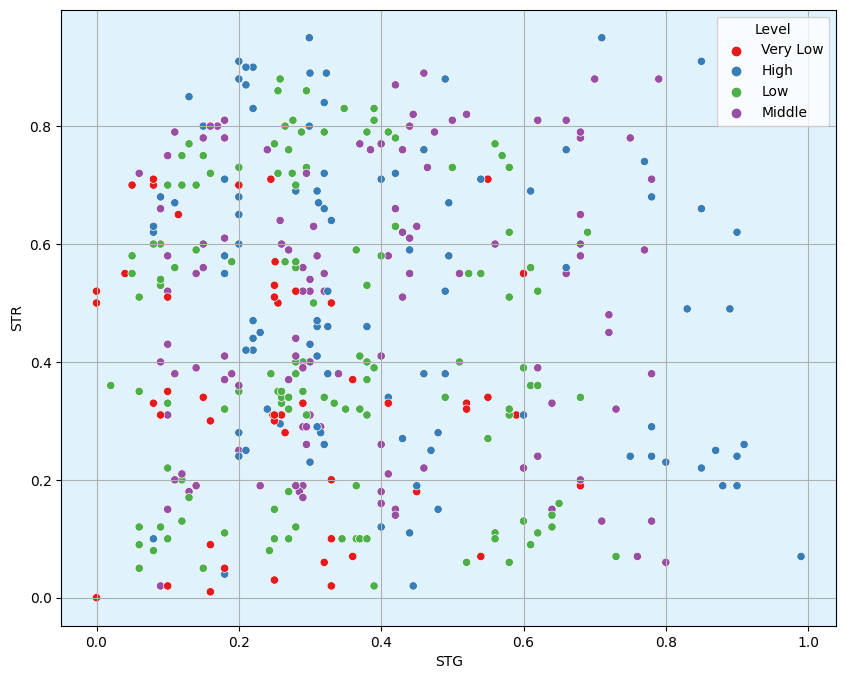

In [13]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['STG'], data['STR'], hue=data['Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

In [14]:
# function for plot histogram
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 55, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

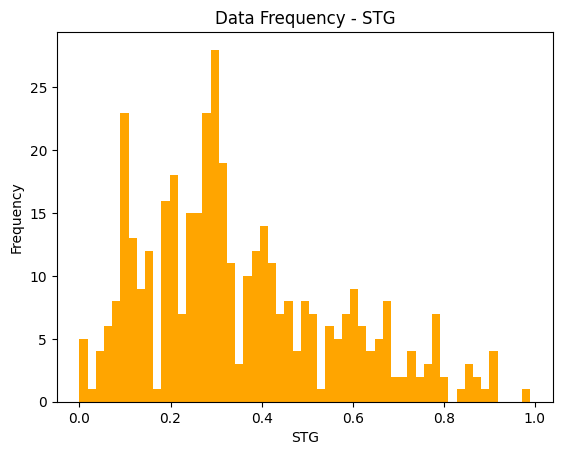

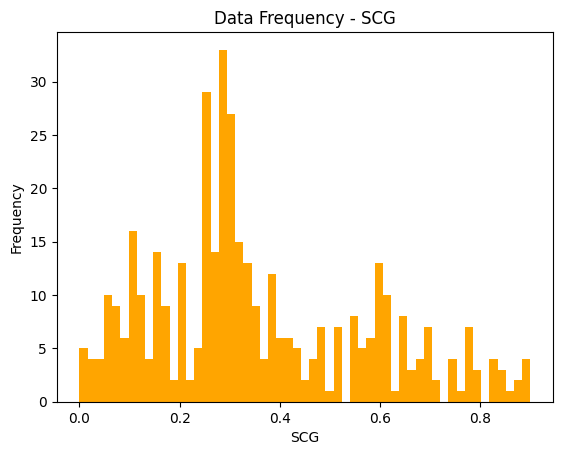

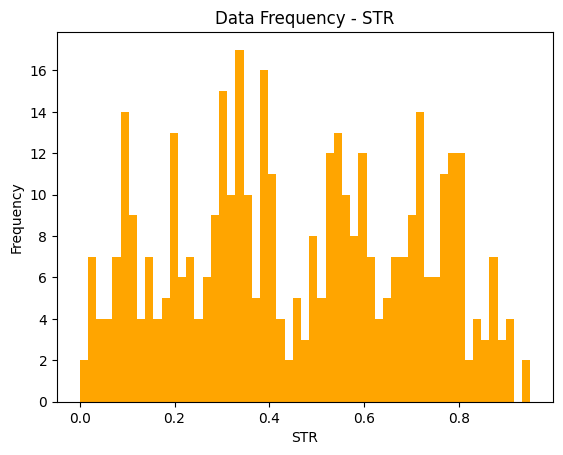

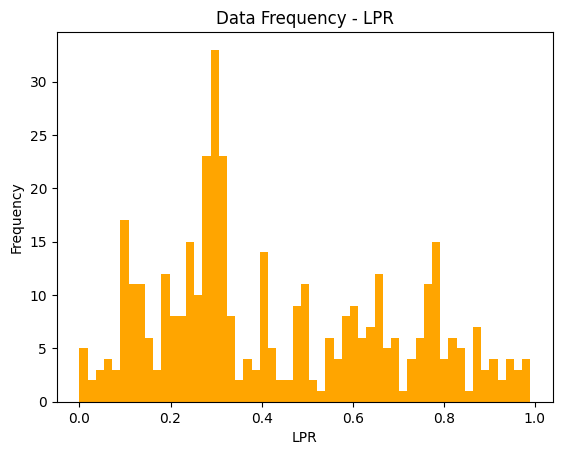

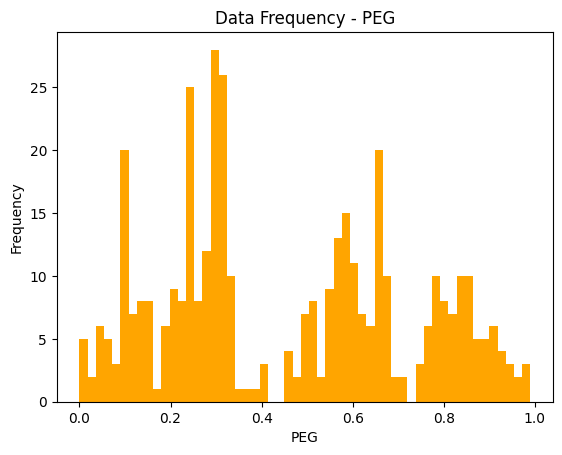

In [15]:
# plot histogram for numerical variables 
numerical_variables = ["STG", "SCG" ,"STR","LPR", "PEG"]
for i in numerical_variables:
    plotHistogram(i)

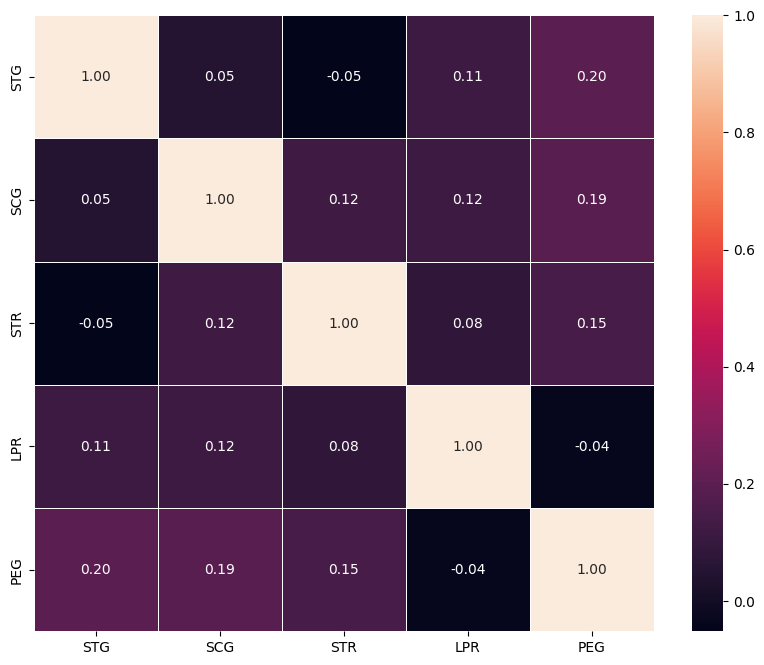

In [16]:
# correlation between numerical variables
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

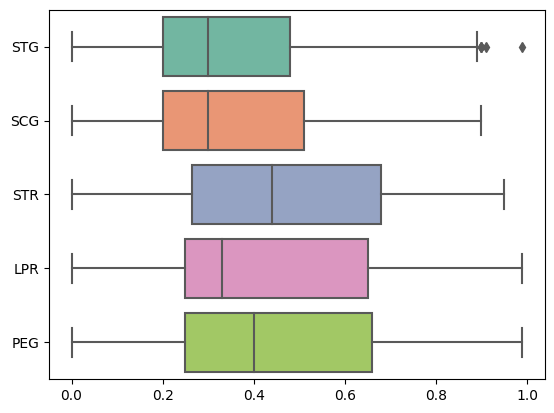

In [17]:
sns.boxplot(data=data.loc[:,["STG", "SCG" ,"STR","LPR", "PEG"]], orient="h", palette="Set2")
plt.show()

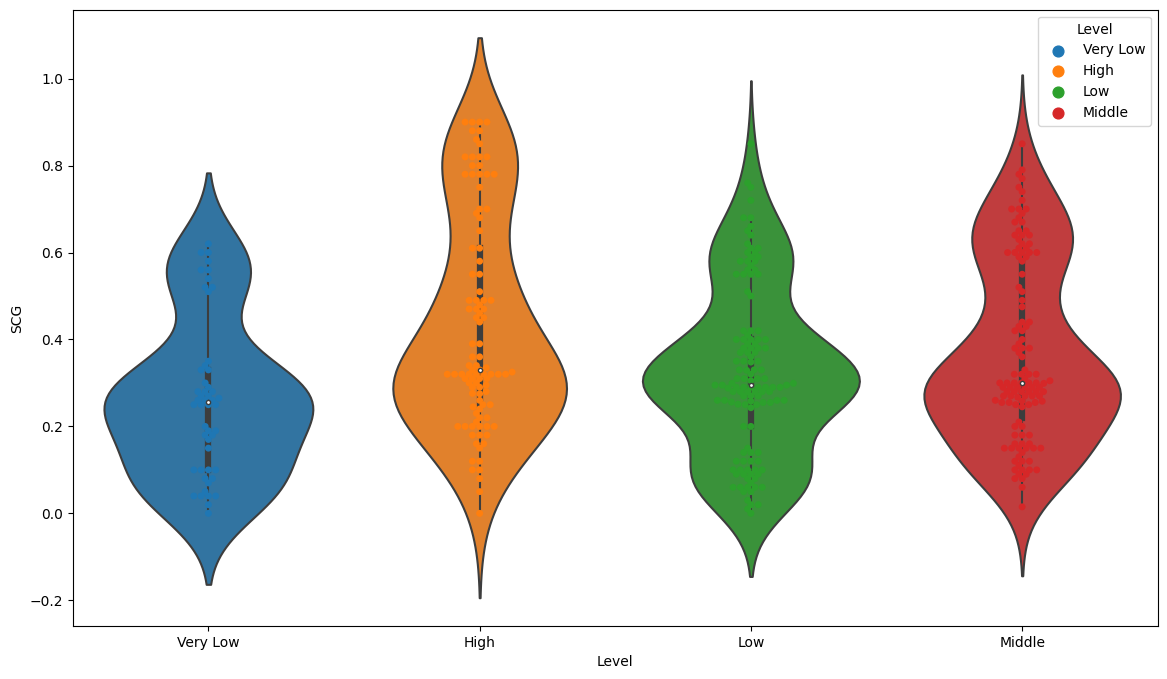

In [18]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'Level', y = 'SCG', data = data, hue = 'Level')
sns.violinplot(x = 'Level', y = 'SCG', data = data)
plt.show()

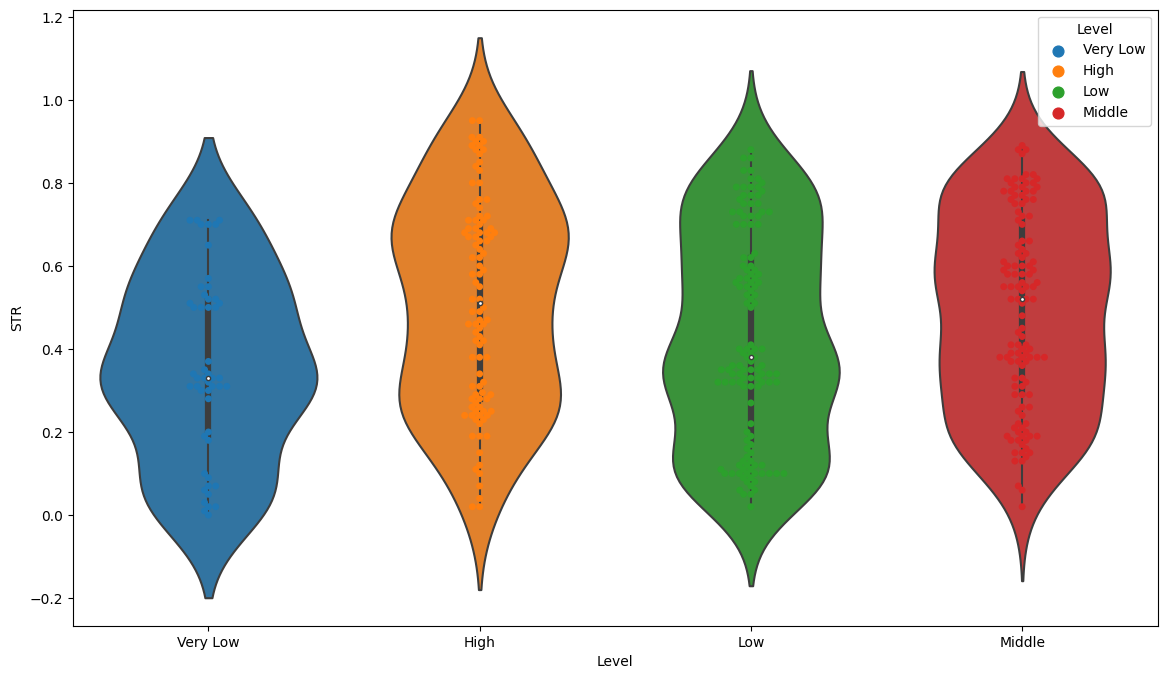

In [19]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'Level', y = 'STR', data = data, hue = 'Level')
sns.violinplot(x = 'Level', y = 'STR', data = data)
plt.show()

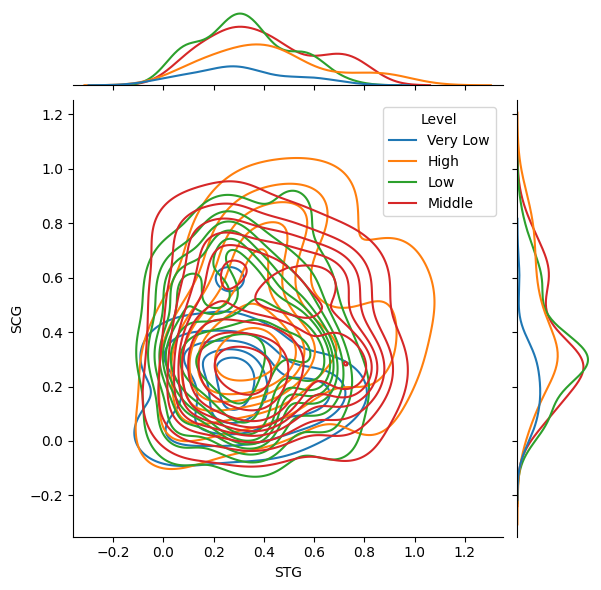

In [20]:
sns.jointplot(
    data=data[~data.index.duplicated()],
    x="STG", y="SCG", hue="Level",
    kind="kde")
plt.show()

## Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [22]:
data["Level"] = labelEncoder(data["Level"])

Encoding Approach:
Very Low  ==>  3
High  ==>  0
Low  ==>  1
Middle  ==>  2


In [23]:
data.head()

,STG,SCG,STR,LPR,PEG,Level
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


In [24]:
# create input and output
X = data.drop('Level', axis = 1)
y = data['Level']

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (322, 5)
y_train: (322,)
X_test: (81, 5)
y_test: (81,)


## Model Training and Test

In [26]:
# import classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# defining the function that multiple machine learning classifier include
def all_classifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier
    """
    
    # standardization of train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # for Support Vector Machine Classifier
    print("*************************************************************************")
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train Accuracy Score for Support Vector Machine Model:', accuracy_score(svm_train_predictions, y_train))
    print("Test Accuracy Score for Support Vector Machine Model:", accuracy_score(svm_test_predictions, y_test))
    print(confusion_matrix(y_test, svm_test_predictions))
    print(classification_report(y_test, svm_test_predictions))
    
    
    # for Decision Tree Classifier
    print("*************************************************************************")
    decisiont_model = DecisionTreeClassifier()
    decisiont_model.fit(X_train, y_train)
    dt_train_predictions = decisiont_model.predict(X_train)
    dt_test_predictions = decisiont_model.predict(X_test)
    print('Train Accuracy Score for Decision Tree Model:', accuracy_score(dt_train_predictions, y_train))
    print("Test Accuracy Score for Decision Tree Model:", accuracy_score(dt_test_predictions, y_test))
    print(confusion_matrix(y_test, dt_test_predictions))
    print(classification_report(y_test, dt_test_predictions))
    
    
    # for GaussianNB Classifier
    print("*************************************************************************")
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    gnb_train_predictions = gnb_model.predict(X_train)
    gnb_test_predictions = gnb_model.predict(X_test)
    print('Train Accuracy Score for GaussianNB Classifier:', accuracy_score(gnb_train_predictions, y_train))
    print("Test Accuracy Score for GaussianNB Classifier:", accuracy_score(gnb_test_predictions, y_test))
    print(confusion_matrix(y_test, gnb_test_predictions))
    print(classification_report(y_test, gnb_test_predictions))
    
    
    # for Bagging Classifier
    print("*************************************************************************")
    bag_model = BaggingClassifier()
    bag_model.fit(X_train, y_train)
    bag_train_predictions = bag_model.predict(X_train)
    bag_test_predictions = bag_model.predict(X_test)
    print('Train Accuracy Score for Bagging Classifier:', accuracy_score(bag_train_predictions, y_train))
    print("Test Accuracy Score for Bagging Classifier:", accuracy_score(bag_test_predictions, y_test))
    print(confusion_matrix(y_test, bag_test_predictions))
    print(classification_report(y_test, bag_test_predictions))

    
    # for Random Forest Classifier
    print("*************************************************************************")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
    print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
    print(confusion_matrix(y_test, rf_test_predictions))
    print(classification_report(y_test, rf_test_predictions))
    
    
    # for Ada Boost Classifier
    print("*************************************************************************")
    ada_model = AdaBoostClassifier()
    ada_model.fit(X_train, y_train)
    ada_train_predictions = ada_model.predict(X_train)
    ada_test_predictions = ada_model.predict(X_test)
    print('Train Accuracy Score for Ada Boost Classifier:', accuracy_score(ada_train_predictions, y_train))
    print("Test Accuracy Score Ada Boost Classifier:", accuracy_score(ada_test_predictions, y_test))
    print(confusion_matrix(y_test, ada_test_predictions))
    print(classification_report(y_test, ada_test_predictions))
    
    
    # for K-Neighbors Classifier
    print("*************************************************************************")
    kn_model = KNeighborsClassifier()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train Accuracy Score for K-Neighbors classifier:', accuracy_score(kn_train_predictions, y_train))
    print("Test Accuracy Score for K-Neighbors Classifier:", accuracy_score(kn_test_predictions, y_test))
    print(confusion_matrix(y_test, kn_test_predictions))
    print(classification_report(y_test, kn_test_predictions))
    
    
    # for Logistic Regression Classifier
    print("*************************************************************************")
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_train_predictions = lr_model.predict(X_train)
    lr_test_predictions = lr_model.predict(X_test)
    print('Train Accuracy Score for Logistic Regression Classifier:', accuracy_score(lr_train_predictions, y_train))
    print("Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(lr_test_predictions, y_test))
    print(confusion_matrix(y_test, lr_test_predictions))
    print(classification_report(y_test, lr_test_predictions))
    
    
    # for XGBoost Classifier
    print("*************************************************************************")
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    xgb_train_predictions = xgb_model.predict(X_train)
    xgb_test_predictions = xgb_model.predict(X_test)
    print('Train Accuracy Score for XGBoost Classifier:', accuracy_score(xgb_train_predictions, y_train))
    print("Test Accuracy Score for XGBoost Classifier:", accuracy_score(xgb_test_predictions, y_test))
    print(confusion_matrix(y_test, xgb_test_predictions))
    print(classification_report(y_test, xgb_test_predictions))
    print("*************************************************************************")
    
    print("----------------Summary----------------")
    print("SVM Test Accuracy:", accuracy_score(svm_test_predictions, y_test))
    print("Decision Tree Test Accuracy:", accuracy_score(dt_test_predictions, y_test))
    print("GaussianNB Test Accuracy:", accuracy_score(gnb_test_predictions, y_test))
    print("Bagging Test Accuracy:", accuracy_score(bag_test_predictions, y_test))
    print("Random Forest Test Accuracy:", accuracy_score(rf_test_predictions, y_test))
    print("Ada Boost Test Accuracy:", accuracy_score(ada_test_predictions, y_test))
    print("K-Neighbors Test Accuracy:", accuracy_score(kn_test_predictions, y_test))
    print("Logistic Regression Test Accuracy:", accuracy_score(lr_test_predictions, y_test))
    print("XGBoost Test Accuracy:", accuracy_score(xgb_test_predictions, y_test))

In [27]:
all_classifiers(X_train, X_test, y_train, y_test)

*************************************************************************
Train Accuracy Score for Support Vector Machine Model: 0.9565217391304348
Test Accuracy Score for Support Vector Machine Model: 0.9382716049382716
[[20  0  1  0]
 [ 0 25  0  0]
 [ 0  2 24  0]
 [ 0  2  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.86      1.00      0.93        25
           2       0.96      0.92      0.94        26
           3       1.00      0.78      0.88         9

    accuracy                           0.94        81
   macro avg       0.96      0.91      0.93        81
weighted avg       0.94      0.94      0.94        81

*************************************************************************
Train Accuracy Score for Decision Tree Model: 1.0
Test Accuracy Score for Decision Tree Model: 0.9382716049382716
[[19  0  2  0]
 [ 0 23  1  1]
 [ 0  0 26  0]
 [ 0  1  0  8]]
              precision    recall 

## Model Selection and Parameter Tuning

In [28]:
# choose the best model for parameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
svc = SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']} 

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=128)

# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=['accuracy'], 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=3)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
print(grid_result)

# print best parameter after tuning
print(grid_result.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_result.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=128, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy'], verbose=3)
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [29]:
grid_predictions = grid_result.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.96      0.96      0.96        25
           2       0.96      1.00      0.98        26
           3       0.89      0.89      0.89         9

    accuracy                           0.96        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.96      0.96      0.96        81



In [30]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the train dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the test dataset is {grid_search.score(X_test, y_test):.4f}')

The best accuracy score for the train dataset is 0.9628
The best hyperparameters are {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
The accuracy score for the test dataset is 0.9630


## Clustering Model

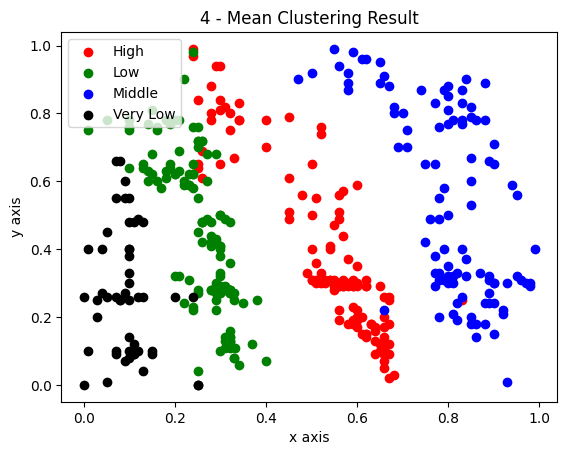

In [31]:
from sklearn.cluster import AgglomerativeClustering

AggC= AgglomerativeClustering(n_clusters=4, affinity= "euclidean", linkage = "ward")
cluster = AggC.fit_predict(data)

data["Level"] = cluster

plt.figure()
plt.scatter(data.PEG[data.Level == 0 ], data.LPR[data.Level == 0],color = "red", label="High")
plt.scatter(data.PEG[data.Level == 1 ], data.LPR[data.Level == 1],color = "green", label="Low")
plt.scatter(data.PEG[data.Level == 2 ], data.LPR[data.Level == 2],color = "blue", label="Middle")
plt.scatter(data.PEG[data.Level == 3 ], data.LPR[data.Level == 3],color = "black", label="Very Low")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("4 - Mean Clustering Result")
plt.show()

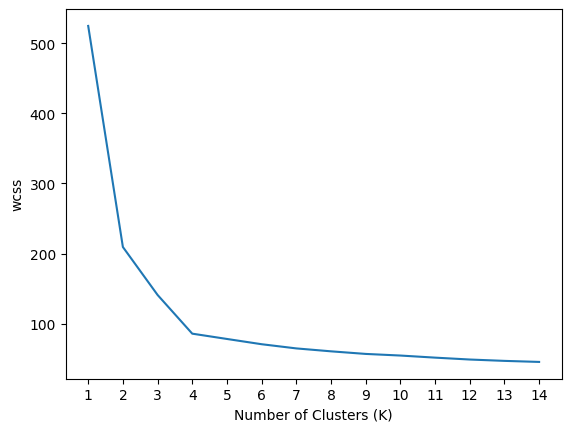

In [32]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()

<Figure size 640x480 with 0 Axes>

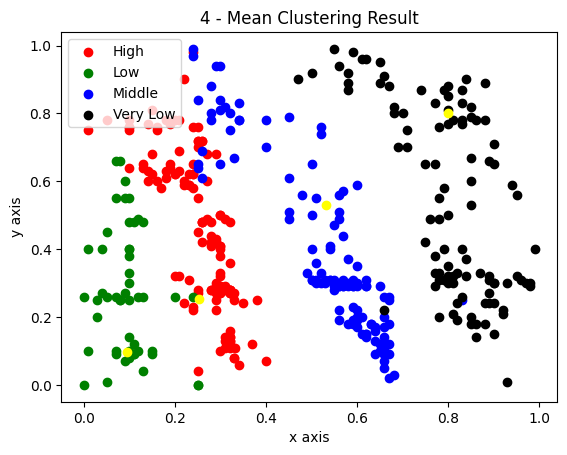

In [33]:
k_mean = KMeans(n_clusters=4)
clusters = k_mean.fit_predict(data)

data["Level"] = clusters

plt.figure()
plt.figure()
plt.scatter(data.PEG[data.Level == 0 ], data.LPR[data.Level == 0], color = "red", label="High")
plt.scatter(data.PEG[data.Level == 1 ], data.LPR[data.Level == 1], color = "green", label="Low")
plt.scatter(data.PEG[data.Level == 2 ], data.LPR[data.Level == 2], color = "blue", label="Middle")
plt.scatter(data.PEG[data.Level == 3 ], data.LPR[data.Level == 3], color = "black", label="Very Low")
plt.scatter(k_mean.cluster_centers_[:,4], k_mean.cluster_centers_[:,4], color = "yellow")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("4 - Mean Clustering Result")
plt.show()